In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from numpy.testing import assert_almost_equal, assert_array_almost_equal

import pytest
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
from table_evaluator.utils import load_data
from table_evaluator import TableEvaluator

In [8]:
real, fake = load_data('../data/real_test_sample.csv', '../data/fake_test_sample.csv')
cat_cols = ['trans_type', 'trans_operation', 'trans_k_symbol']


In [9]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,951892,3245,3878.0,13680.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,2165
1,3547680,515,65.9,14898.6,CREDIT,UNKNOWN,INTEREST_CREDITED,2006
2,1187131,4066,32245.0,57995.5,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,2139
3,531421,1811,3990.8,23324.9,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,LOAN_PAYMENT,892
4,37081,119,12100.0,36580.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,654


In [10]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,911598,3001,13619.0,92079.0,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,1885
1,377371,1042,4174.0,32470.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1483
2,970113,3225,274.0,57608.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1855
3,450090,1489,301.0,36258.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,885
4,1120409,3634,6303.0,50975.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1211


In [11]:
table_evaluator = TableEvaluator(real, fake)

Do Visual Evaluation

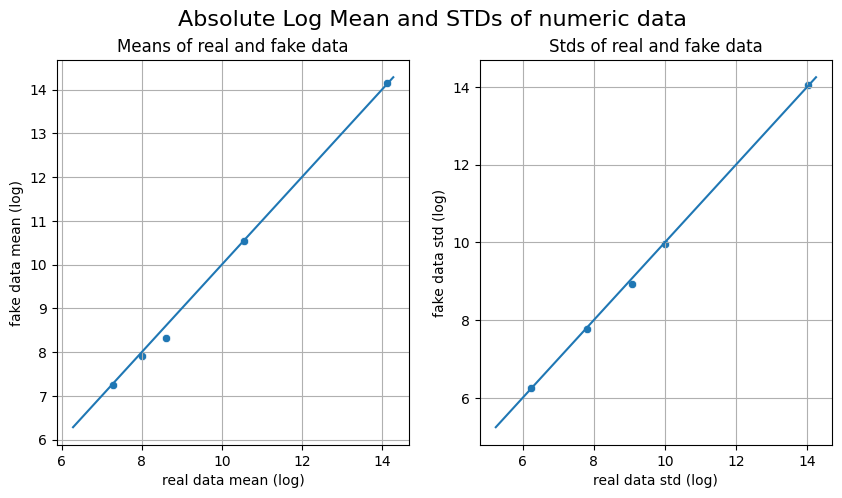

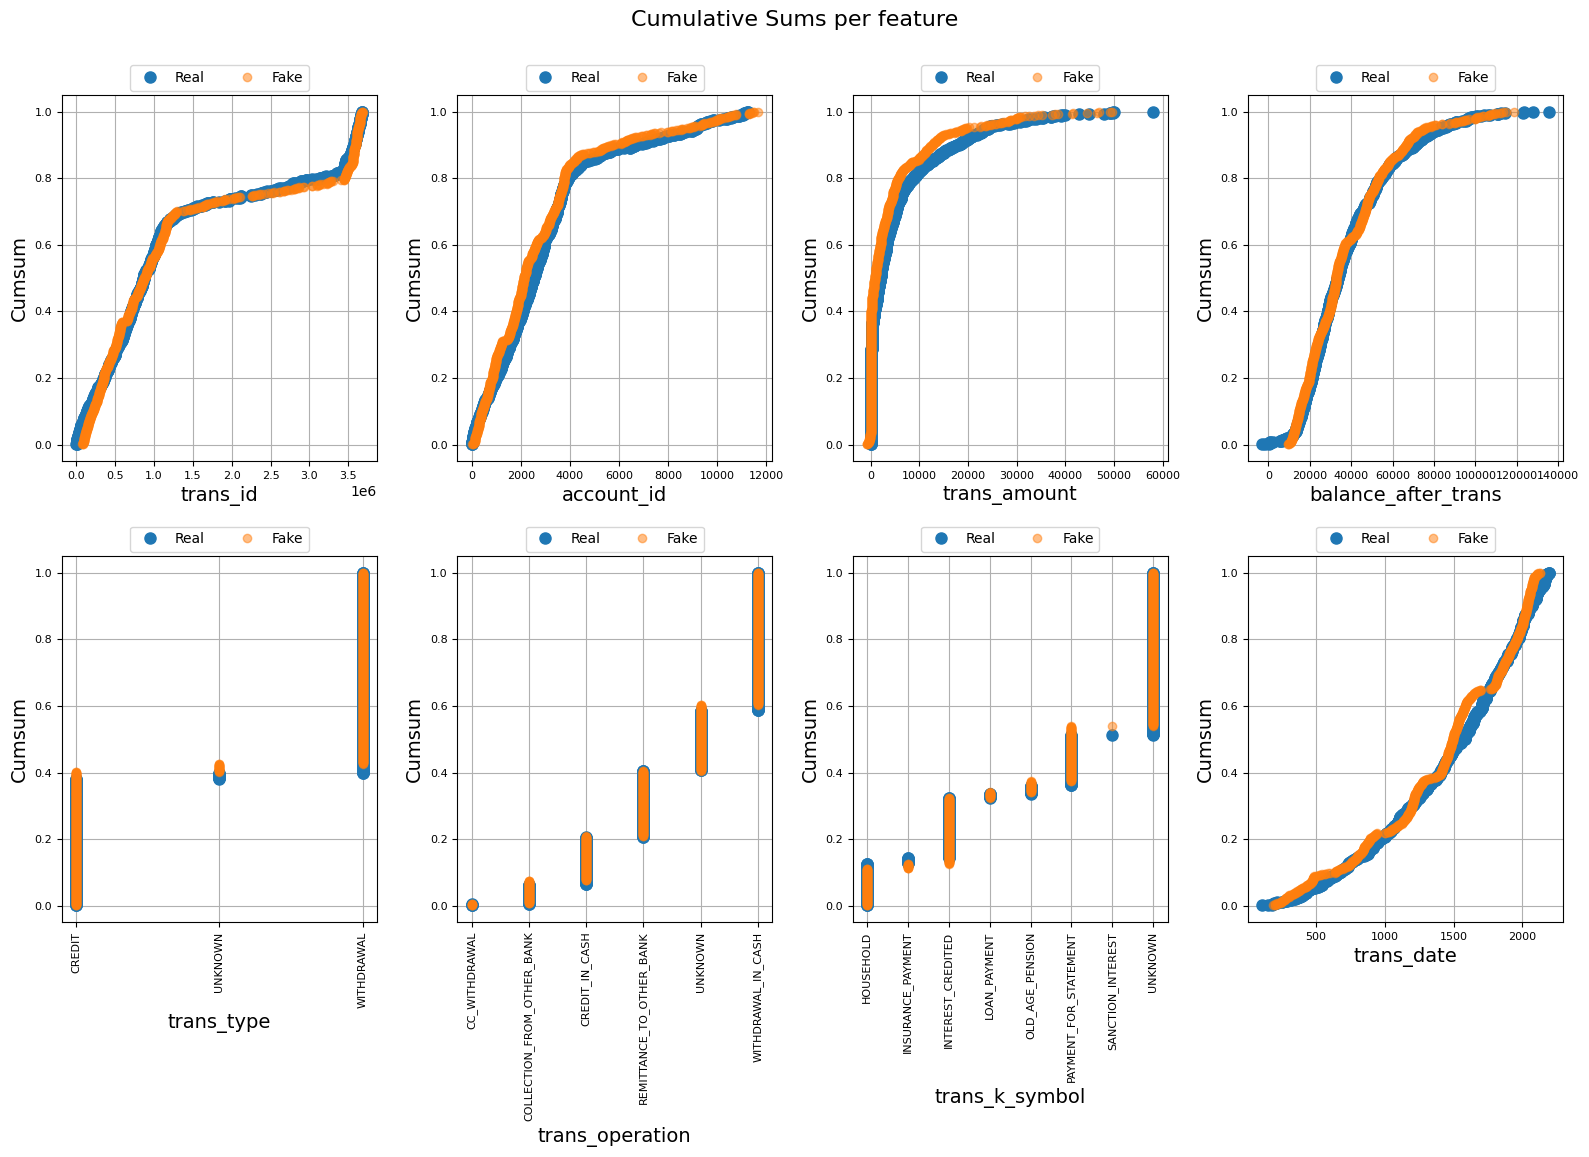

/Users/tn14gn/Developer/table-evaluator/table_evaluator/table_evaluator.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/Users/tn14gn/Developer/table-evaluator/table_evaluator/table_evaluator.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/Users/tn14gn/Developer/table-evaluator/table_evaluator/table_evaluator.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")


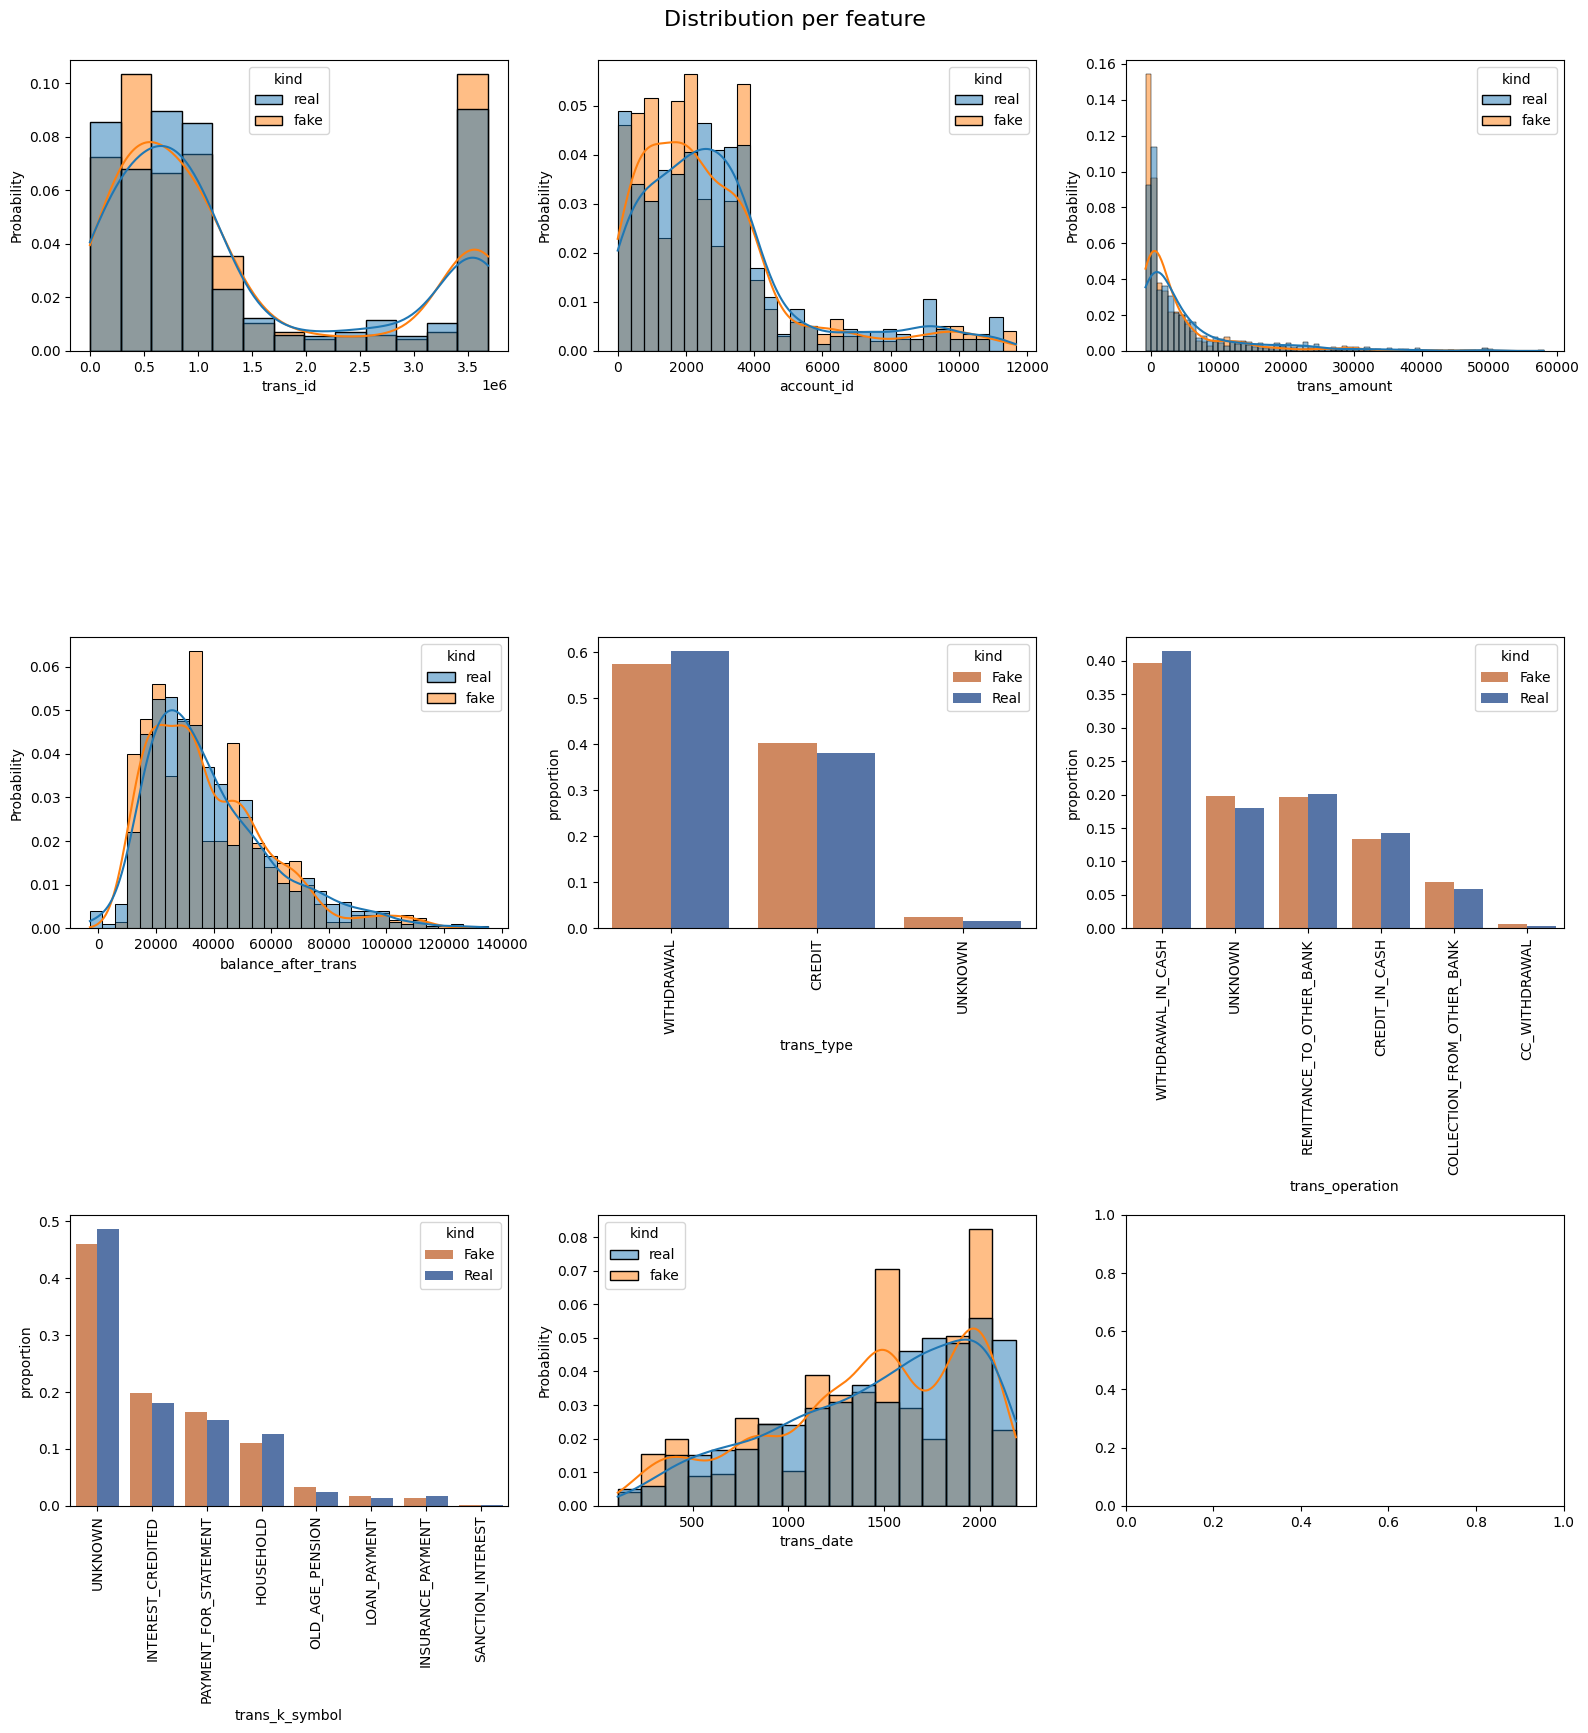

<Figure size 640x480 with 0 Axes>

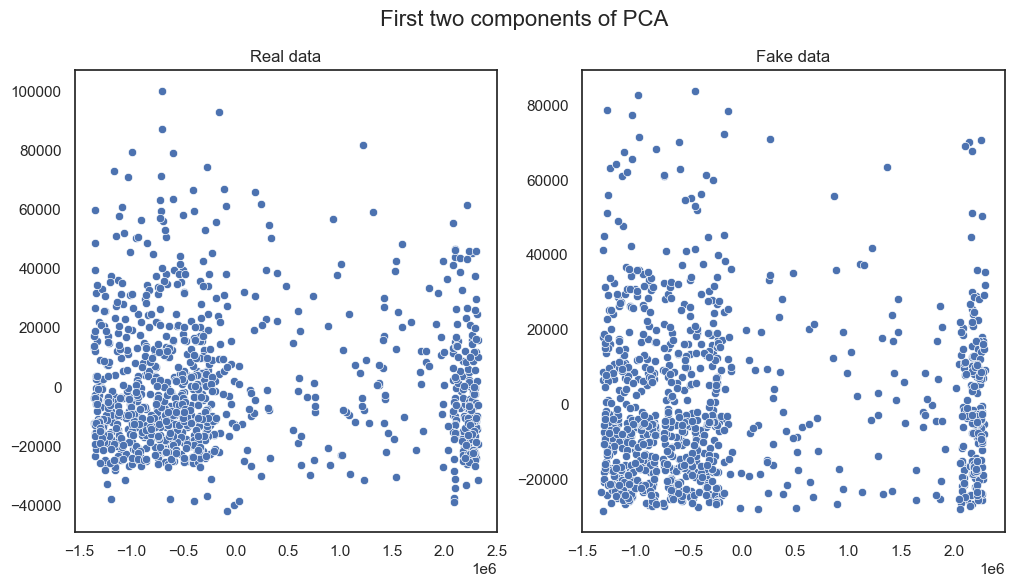

In [13]:
table_evaluator.visual_evaluation()

In [14]:
len(real)

1000

In [15]:
table_evaluator.get_copies(return_len=True)

0

In [16]:
table_evaluator.get_duplicates()

(0, 0)

In [18]:
table_evaluator.evaluate(target_col='trans_type')

/Users/tn14gn/.pyenv/versions/3.12.5/envs/table-evaluator/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/tn14gn/.pyenv/versions/3.12.5/envs/table-evaluator/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


IPython not installed.

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.9650   0.9700              0.9324
DecisionTreeClassifier_real   0.9700   0.9350              0.8779
LogisticRegression_fake       0.8100   0.8050              0.9048
LogisticRegression_real       0.8300   0.8150              0.9324
MLPClassifier_fake            0.6650   0.3450              0.4085
MLPClassifier_real            0.6300   0.3300              0.4134
RandomForestClassifier_fake   0.9600   0.9600              0.9802
RandomForestClassifier_real   0.9750   0.9750              1.0000

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.5655
nearest neighbor std                     0.3726

Miscellaneous results:
                            